In [40]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
apple = pd.read_csv('HistoricalQuotes.csv')
apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [16]:
apple['year'] = pd.DatetimeIndex(apple.Date).year
apple.head()

,Date,Close/Last,Volume,Open,High,Low,year
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37,2020
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96,2020
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5,2020
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13,2020
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23,2020


#### Filtering data for only 2020 and 2019 yeer

In [21]:
apple_df = apple[(apple['year'] == 2020) | (apple['year'] == 2019)] 

In [22]:
#training days
print('Training days =', apple_df.shape)

Training days = (292, 7)


#### let's start cleaning our data

In [23]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 291
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         292 non-null    object
 1    Close/Last  292 non-null    object
 2    Volume      292 non-null    int64 
 3    Open        292 non-null    object
 4    High        292 non-null    object
 5    Low         292 non-null    object
 6   year         292 non-null    int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 17.1+ KB


In [41]:
apple_df.Date = pd.DatetimeIndex(apple_df.Date)

In [42]:
apple_df.dtypes

Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
year                   int32
dtype: object

- Removing extra spaces from column names

In [43]:
apple_df.rename(columns=lambda x: x.strip(), inplace=True)
apple_df.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low', 'year'], dtype='object')

- Close/Last, open, high, low should be float. So, converting datatype from object to float

In [47]:
#renaming close/last column name to just close
apple_df.rename(columns= {'Close/Last': 'Close'},inplace=True)

In [51]:
#now making necessary changes to column values before changing their dtype
#looks like we have spaces in our column vals as well. let's correct them
apple_df['Close'] = apple_df['Close'].apply(lambda x: x.strip())
apple_df['Open'] = apple_df['Open'].apply(lambda x: x.strip())
apple_df['High'] = apple_df['High'].apply(lambda x: x.strip())
apple_df['Low'] = apple_df['Low'].apply(lambda x: x.strip())

In [53]:
#now let's remove $ from these columns
apple_df['Close'] = apple_df['Close'].apply(lambda x: float(x.strip("$")))
apple_df['Open'] = apple_df['Open'].apply(lambda x: float(x.strip("$")))
apple_df['High'] = apple_df['High'].apply(lambda x: float(x.strip("$")))
apple_df['Low'] = apple_df['Low'].apply(lambda x: float(x.strip("$"))) 

In [54]:
apple_df.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
Open             float64
High             float64
Low              float64
year               int32
dtype: object

In [61]:
#sorting by date
apple_df.sort_values(by='Date', inplace=True)

In [72]:
apple_df.reset_index(inplace=True)

In [75]:
apple_df.drop(columns='index', inplace=True) 

#### Let's visualise the Apple stock price data (2019-2020)

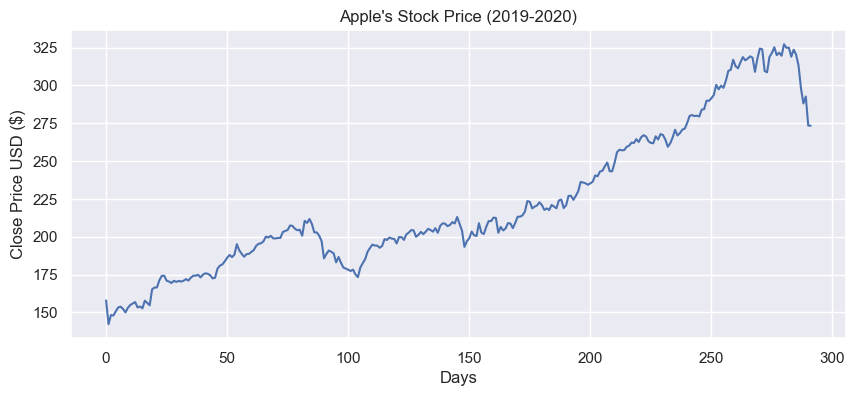

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,4))
plt.title("Apple's Stock Price (2019-2020)")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(apple_df['Close'])
plt.show() 

#### getting the close price

In [77]:
apple_close = apple_df[['Close']]
apple_close.head()

,Close
0,157.92
1,142.19
2,148.26
3,147.93
4,150.75


#### Creating a variable to predict ‘X’ days in the future:

In [78]:
futureDays = 25

- **Create a new target column shifted ‘X’ units/days up:**

In [79]:
apple_close["Prediction"] = apple_close[["Close"]].shift(-futureDays)
print(apple_close.head())
print(apple_close.tail()) 

    Close  Prediction
0  157.92      170.94
1  142.19      170.41
2  148.26      169.43
3  147.93      170.89
4  150.75      170.18
      Close  Prediction
287  298.18         NaN
288  288.08         NaN
289  292.65         NaN
290  273.52         NaN
291  273.36         NaN


- creating a feature dataset (x) and converting it into a numpy array and let's remove last ‘x’ rows/days, since we will predict for those days:

In [81]:
import numpy as np
x = np.array(apple_close.drop(["Prediction"], axis=1))[:-futureDays]
print(x) 

[[157.92 ]
 [142.19 ]
 [148.26 ]
 [147.93 ]
 [150.75 ]
 [153.31 ]
 [153.8  ]
 [152.29 ]
 [150.   ]
 [153.07 ]
 [154.94 ]
 [155.86 ]
 [156.82 ]
 [153.3  ]
 [153.92 ]
 [152.7  ]
 [157.76 ]
 [156.3  ]
 [154.68 ]
 [165.25 ]
 [166.44 ]
 [166.52 ]
 [171.25 ]
 [174.18 ]
 [174.24 ]
 [170.94 ]
 [170.41 ]
 [169.43 ]
 [170.89 ]
 [170.18 ]
 [170.8  ]
 [170.42 ]
 [170.93 ]
 [172.03 ]
 [171.06 ]
 [172.97 ]
 [174.23 ]
 [174.33 ]
 [174.87 ]
 [173.15 ]
 [174.97 ]
 [175.85 ]
 [175.53 ]
 [174.52 ]
 [172.5  ]
 [172.91 ]
 [178.9  ]
 [180.91 ]
 [181.71 ]
 [183.73 ]
 [186.12 ]
 [188.02 ]
 [186.53 ]
 [188.16 ]
 [195.09 ]
 [191.05 ]
 [188.74 ]
 [186.79 ]
 [188.47 ]
 [188.72 ]
 [189.95 ]
 [191.24 ]
 [194.02 ]
 [195.35 ]
 [195.69 ]
 [197.   ]
 [200.1  ]
 [199.5  ]
 [200.62 ]
 [198.95 ]
 [198.87 ]
 [199.23 ]
 [199.25 ]
 [203.13 ]
 [203.86 ]
 [204.53 ]
 [207.48 ]
 [207.16 ]
 [205.28 ]
 [204.3  ]
 [204.61 ]
 [200.67 ]
 [210.52 ]
 [209.15 ]
 [211.75 ]
 [208.48 ]
 [202.86 ]
 [202.9  ]
 [200.72 ]
 [197.18 ]
 [185.72 ]

- creating a target dataset (y) and convert it to a numpy array and get all of the target values except the last ‘x’ rows days:

In [82]:
y = np.array(apple_close["Prediction"])[:-futureDays]
print(y) 

[170.94  170.41  169.43  170.89  170.18  170.8   170.42  170.93  172.03
 171.06  172.97  174.23  174.33  174.87  173.15  174.97  175.85  175.53
 174.52  172.5   172.91  178.9   180.91  181.71  183.73  186.12  188.02
 186.53  188.16  195.09  191.05  188.74  186.79  188.47  188.72  189.95
 191.24  194.02  195.35  195.69  197.    200.1   199.5   200.62  198.95
 198.87  199.23  199.25  203.13  203.86  204.53  207.48  207.16  205.28
 204.3   204.61  200.67  210.52  209.15  211.75  208.48  202.86  202.9
 200.72  197.18  185.72  188.66  190.92  190.08  189.    183.09  186.6
 182.78  179.66  178.97  178.23  177.38  178.3   175.07  173.3   179.64
 182.54  185.22  190.15  192.58  194.81  194.19  194.15  192.74  193.89
 198.45  197.87  199.46  198.78  198.58  195.57  199.8   199.74  197.92
 201.55  202.73  204.41  204.23  200.02  201.24  203.23  201.75  203.3
 205.21  204.5   203.35  205.66  202.59  207.22  208.84  208.67  207.02
 207.74  209.68  208.78  213.04  208.43  204.02  193.34  197.    19

#### Splitting the data into 80% training and 20% testing

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Creating Models

In [84]:
#creating decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [85]:
#creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(x_train, y_train)

- to get last 'x' rows/days of the feature dataset

In [89]:
xfuture = apple_close.drop(['Prediction'], axis=1)[:-futureDays]

In [90]:
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
xfuture = np.array(xfuture)
print(xfuture) 

[[280.41]
 [279.74]
 [280.02]
 [279.44]
 [284.  ]
 [284.27]
 [289.91]
 [289.8 ]
 [291.52]
 [293.65]
 [300.35]
 [297.43]
 [299.8 ]
 [298.39]
 [303.19]
 [309.63]
 [310.33]
 [316.96]
 [312.68]
 [311.34]
 [315.24]
 [318.73]
 [316.57]
 [317.7 ]
 [319.23]]


#### To see model tree prediction 

In [91]:
treePrediction = tree.predict(xfuture)
print("Decision Tree Prediction =", treePrediction)

Decision Tree Prediction = [318.31 319.23 319.23 324.34 309.51 309.51 308.66 318.85 321.45 325.21
 320.03 321.55 320.03 327.2  324.87 324.95 324.95 323.62 320.3  313.05
 298.18 273.36 292.65 273.52 273.36]


#### To see the model linear regression prediction

In [92]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =", linearPrediction)

Linear regression Prediction = [297.67025898 296.96721646 297.26102527 296.65242131 301.43730765
 301.72062329 307.63877218 307.52334729 309.32817284 311.56321844
 318.59364354 315.52963737 318.01651909 316.53698187 321.57370433
 328.33130697 329.06582899 336.0228019  331.53172437 330.12563934
 334.21797635 337.8800933  335.6135682  336.79929661 338.40475189]


#### Visualize decision tree predictions

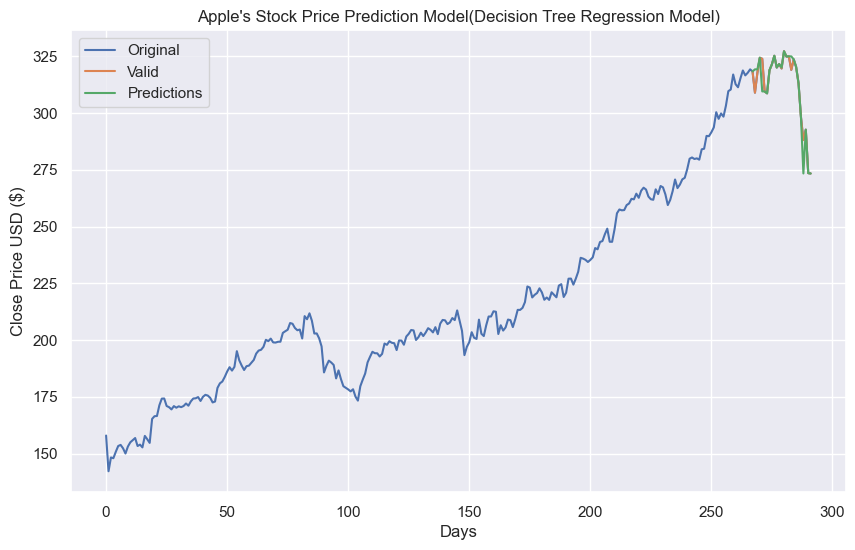

In [101]:
predictions = treePrediction
valid = apple_close[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10,6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple_close["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show() 

#### Visualize the Linear Model Predictions

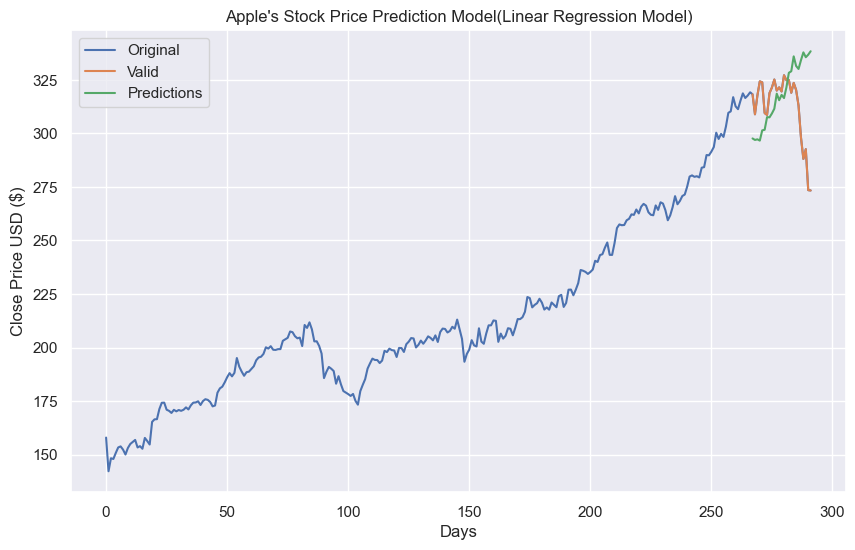

In [102]:
predictions = linearPrediction
valid = apple_close[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(10,6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple_close['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predictions'])
plt.show() 